In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import svd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [ ]:
#importing the data and some basic stuff

data = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [ ]:
data.fillna(0, inplace = True)

standardScaler = StandardScaler()
data = standardScaler.fit_transform(data)

In [ ]:
X = data[:,1:]
y = data[:,:1]

print(f"x shape: {X.shape}")
samples = X.shape[0] #the number of samples
features = X.shape[1]
X = X - np.mean(X, axis = 0)

x shape: (19999, 784)


In [ ]:
def findPrincipalComponents(X, components):
  u, sigma, vt = svd(X, full_matrices = False)
  sigma_matrix = np.zeros((features,features))

  for i in range(features):
      sigma_matrix[i][i] = sigma[i]

  principal_components = np.dot(u, sigma_matrix)
  X_transformed = principal_components[:,:components]

  return X_transformed

In [ ]:
def GmmClustering(X, n_clusters):

  gaussianMixture = GaussianMixture(n_components = n_clusters)

  gaussianMixture.fit(X) #fits the distributions to the cluster

  cluster_labels = gaussianMixture.predict(X) #finds the which point belongs to which cluster

  clusters = [[] for _ in range (n_clusters)] #making a list of lists to find out which indexes does a cluster have

  for i in range (samples):
    clusters[cluster_labels[i]].append(i) #adding the indexes to the list of lists

  return clusters

In [ ]:
def PCA_GMM_combinations(X, components, n_clusters):
  print(f"Results for dataset with {components} dimensions with {n_clusters} clusters")
  X_transformed = findPrincipalComponents(X, components)
  final_clusters = GmmClustering(X_transformed, n_clusters)

  return final_clusters

In [ ]:
#function to print images from each cluster

def showFigure(imcount, clusters):
  for i in range(len(clusters)):
      plt.figure(figsize=(20, 4))
      plt.suptitle(f'Cluster {i+1}')
      for index in range(imcount):
        image = X[clusters[i][index], :]
        ax = plt.subplot(2, imcount, index + 1)
        plt.imshow(image.reshape(28, 28))
        plt.gray()
      plt.show()

In [ ]:
cluster32_10 = PCA_GMM_combinations(X, 32, 10)
showFigure(10, cluster32_10)

Results for dataset with 32 dimensions with 10 clusters


Results for dataset with 32 dimensions with 7 clusters


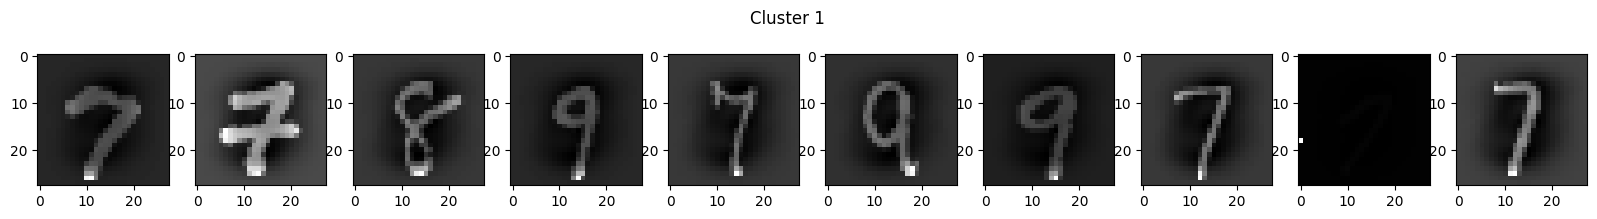

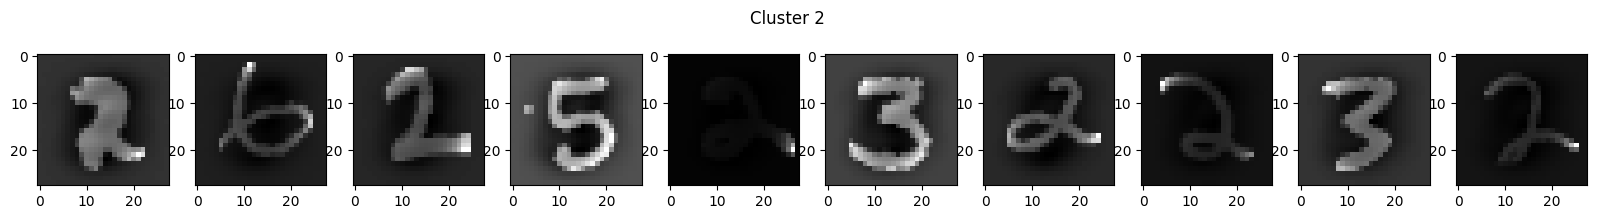

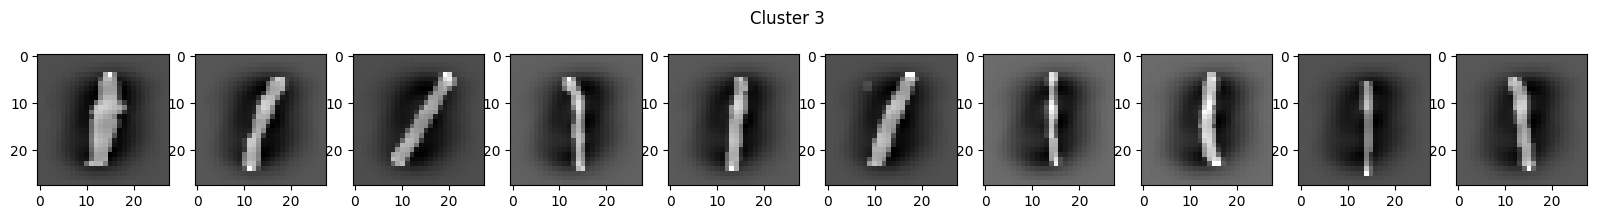

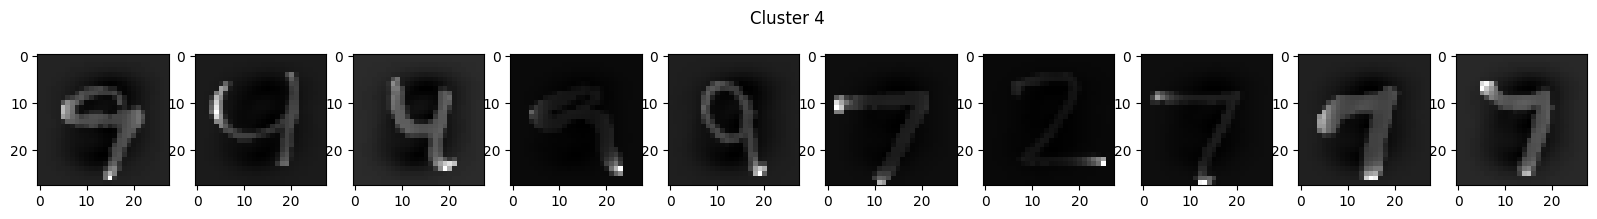

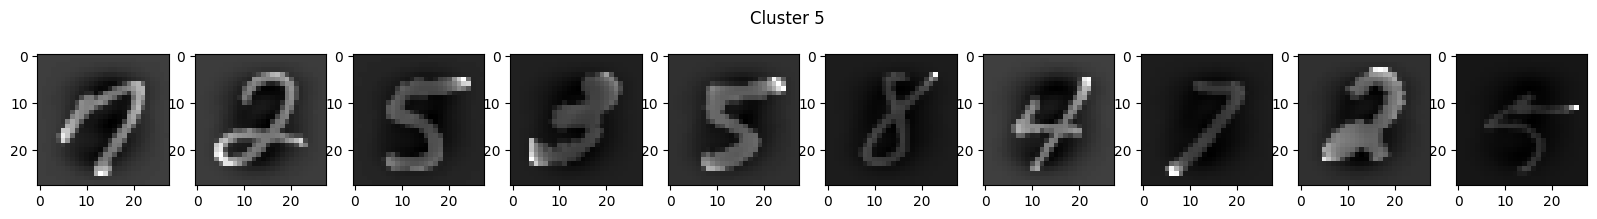

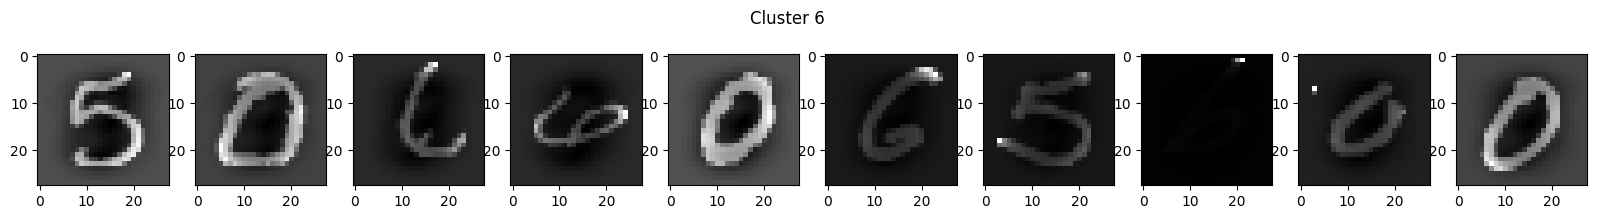

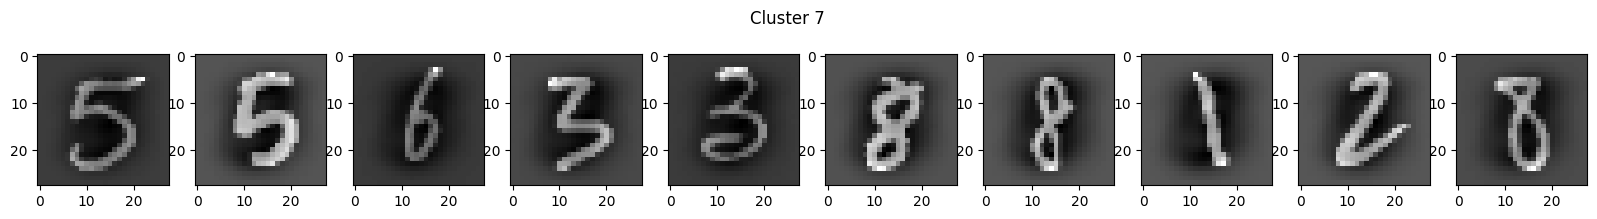

In [ ]:
cluster32_7 = PCA_GMM_combinations(X, 32, 7)
showFigure(10, cluster32_7)

In [ ]:
cluster32_4 = PCA_GMM_combinations(X, 32, 4)
showFigure(10, cluster32_4)

In [ ]:
cluster32_4 = PCA_GMM_combinations(X, 64, 10)
showFigure(10, cluster32_4)

In [ ]:
cluster32_4 = PCA_GMM_combinations(X, 64, 7)
showFigure(10, cluster32_4)

In [ ]:
cluster32_4 = PCA_GMM_combinations(X, 64, 4)
showFigure(10, cluster32_4)

In [ ]:
cluster32_4 = PCA_GMM_combinations(X, 128, 10)
showFigure(10, cluster32_4)

In [ ]:
cluster32_4 = PCA_GMM_combinations(X, 128, 7)
showFigure(10, cluster32_4)

Results for dataset with 128 dimensions with 4 clusters


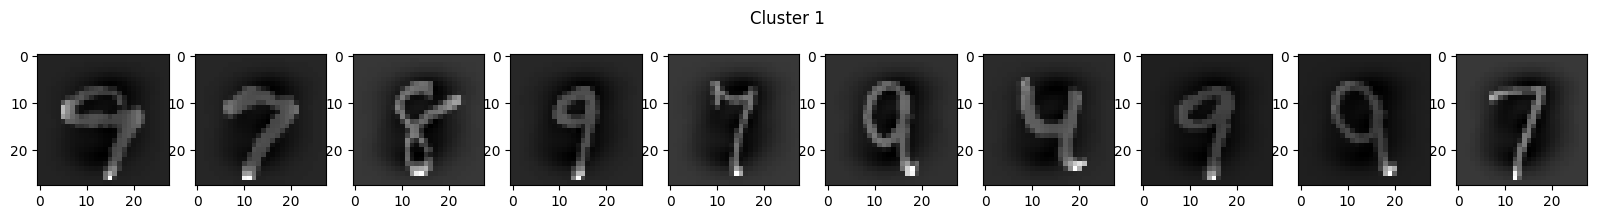

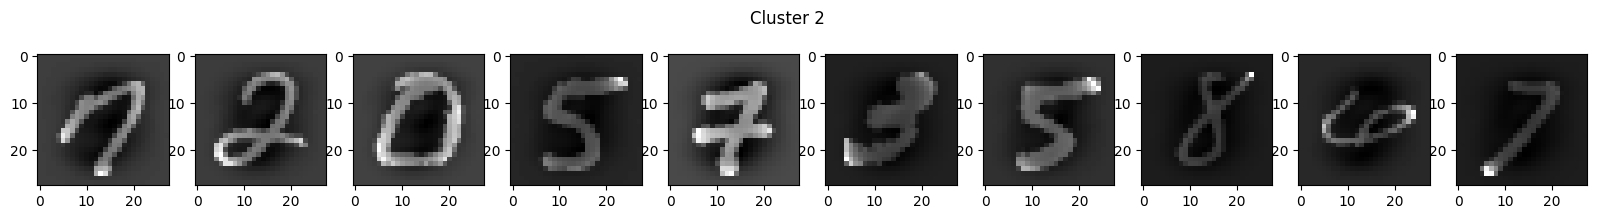

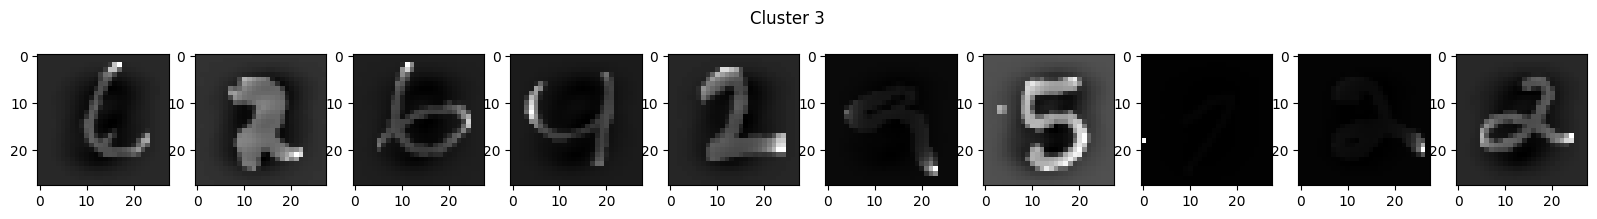

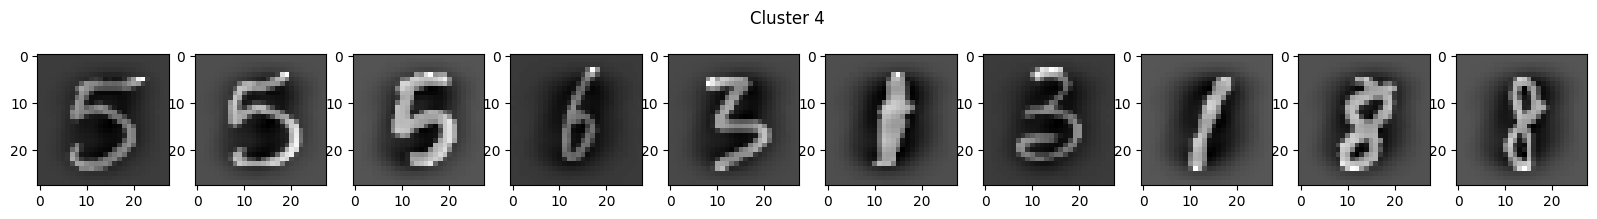

In [ ]:
cluster32_4 = PCA_GMM_combinations(X, 128, 4)
showFigure(10, cluster32_4)